# Phishing Websites Detection

Dataset: https://data.mendeley.com/datasets/72ptz43s9v/1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data = pd.read_csv('dataset.csv')
data.drop_duplicates(inplace=True) # Drop Duplicate Data

data.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                2   
1                    0              0  ...                1                2   
2                    0              0  ...                1                2   
3                    0              0  ...                1                2   
4                    0              0  ...                1                2   

   qty_mx_servers  ttl_hostname  tls_ssl_certificate  qty_redirects  \
0               0           892                    0              0   
1               1          9540                    1              0   
2               3           589                    1              0   
3               0           292                    1              0   
4               1          3597                    0              1   

   url_google_index  domain_google_index  url_shortened  phishing  
0                 0                    0              0         1  
1                 0                    0              0         1  
2                 0                    0              0         0  
3                 0                    0              0         1  
4                 0                    0              0         0  

[5 rows x 112 columns]

In [3]:
data.shape

(87209, 112)

# Data Visualization

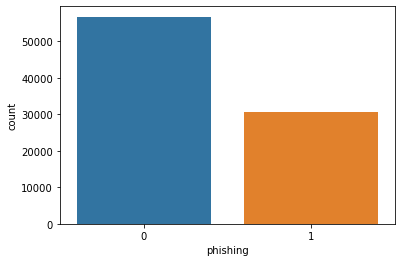

In [4]:
sns.countplot(data=data, x='phishing')
plt.show()

In [5]:
print("1 :", data.phishing.sum())
print("0 :", data.shape[0]-data.phishing.sum())

1 : 30497
0 : 56712


# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop('phishing', axis=1)
y = data.phishing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1 : 20409
0 : 38021


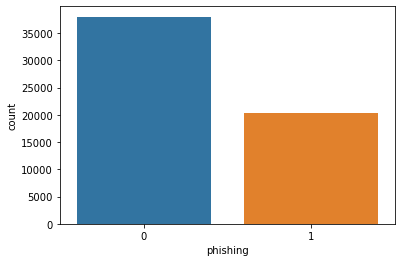

In [7]:
print("1 :", y_train.sum())
print("0 :", X_train.shape[0]-y_train.sum())

sns.countplot(data=X_train, x=y_train)
plt.show()

In [8]:
print("1 :", y_test.sum())
print("0 :", X_test.shape[0]-y_test.sum())

sns.countplot(data=X_test, x=y_test)
plt.show()

1 : 10088
0 : 18691


# Model Building

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Naive Bayes Classifier
4. Support Vector Classifier

In [9]:
from sklearn.metrics import accuracy_score

## 1. Logistic Regression Classifier

In [10]:
from sklearn.linear_model import LogisticRegression

def LRC(X_train, X_test, y_train, y_test):
    print("Training Data")
    
    start_time = time.time()
    
    lrc = LogisticRegression(random_state=4, solver='lbfgs', max_iter=10000)
    lrc.fit(X_train, y_train)
    
    end_time = time.time()
    
    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)
    
    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = lrc.predict(X_test)
    end_time = time.time()

    print("Time taken to predict data", end_time-start_time)
    
    print("Logistic Regression Classifier gives Accuracy :", accuracy_score(y_test, y_predicted))
    return lrc

## 2. Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

def RFC(X_train, X_test, y_train, y_test):

    print("Training Data")

    start_time = time.time()    
    rfc = RandomForestClassifier(max_depth=10, random_state=18)
    rfc.fit(X_train, y_train)
    end_time = time.time()
    
    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)
    
    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = rfc.predict(X_test)
    end_time = time.time()

    print("Time taken to predict data", end_time-start_time)
        
    print("Random Forest Classifier gives Accuracy :", accuracy_score(y_test, y_predicted))
    return rfc

## 3. Naive Bayes Classifier

* Gaussian Naive Bayes
* Multinomial Naive Bayes
* Complement Naive Bayes
* Bernoulli Naive Bayes
* Categorical Naive Bayes
* Out-of-core naive Bayes model fitting

### Gaussian Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

def GNB(X_train, X_test, y_train, y_test):
    
    print("Training Data")

    start_time = time.time()    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    end_time = time.time()

    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)

    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = gnb.predict(X_test)
    end_time = time.time()

    print("Gaussian Naive Bayes gives Accuracy :", accuracy_score(y_test, y_predicted))
    return gnb

### BernoulliNB Naive Bayes

In [13]:
from sklearn.naive_bayes import BernoulliNB

def BNB(X_train, X_test, y_train, y_test):
    
    print("Training Data")

    start_time = time.time()    
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    end_time = time.time()

    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)

    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = bnb.predict(X_test)
    end_time = time.time()

    print("Bernoulli Naive Bayes gives Accuracy :", accuracy_score(y_test, y_predicted))
    return bnb

## 4. Support Vector Classifier

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

def SVM_SVC(X_train, X_test, y_train, y_test):

    print("Training Data")

    start_time = time.time()
    svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    svc.fit(X_train, y_train)
    end_time = time.time()

    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)

    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = svc.predict(X_test)
    end_time = time.time()

    print("Time taken to predict data", end_time-start_time)
        
    print("Support Vector Classifier Classifier gives Accuracy :", accuracy_score(y_test, y_predicted))
    return svc

# Prediction

In [15]:
lrc = LRC(X_train, X_test, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 18.48924970626831
Checking Accuracy...
Time taken to predict data 0.03572535514831543
Logistic Regression Classifier gives Accuracy : 0.9150074707251815


In [16]:
rfc = RFC(X_train, X_test, y_train, y_test) 

Training Data
--------------- Model Trained ---------------
Time taken to train data 4.367151737213135
Checking Accuracy...
Time taken to predict data 0.26731038093566895
Random Forest Classifier gives Accuracy : 0.9499287675040828


In [17]:
svc = SVM_SVC(X_train, X_test, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 103.8543963432312
Checking Accuracy...
Time taken to predict data 41.63881230354309
Support Vector Classifier Classifier gives Accuracy : 0.942319052086591


In [18]:
gnb = GNB(X_train, X_test, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.09253287315368652
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8485353903888252


In [19]:
bnb = BNB(X_train, X_test, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.11092543601989746
Checking Accuracy...
Bernoulli Naive Bayes gives Accuracy : 0.8777233399353696


# Feature Selection

1. Dropping Constant Features
2. Removing Highly Correlated Features

## 1. Dropping constant features

In [20]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(X_train)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_train_new = X_train[X_train.columns[var.get_support()]]
# X_train.head()
X_test_new = X_test[X_test.columns[var.get_support()]]
# X_test.head()

print("Columns Left :",len(X_train_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


In [21]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 8.966055631637573
Checking Accuracy...
Time taken to predict data 0.010260343551635742
Logistic Regression Classifier gives Accuracy : 0.9113589770318635
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.572571516036987
Checking Accuracy...
Time taken to predict data 0.5078980922698975
Random Forest Classifier gives Accuracy : 0.9504152333298586
Training Data
--------------- Model Trained ---------------
Time taken to train data 144.30691719055176
Checking Accuracy...
Time taken to predict data 50.077621936798096
Support Vector Classifier Classifier gives Accuracy : 0.9431182459432225
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.13263487815856934
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8485353903888252
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.1194386482238769

Clearly, we see that accuracy not decrease due to removing these features, so we can remove them

In [22]:
X_train = X_train_new
X_test = X_test_new

## 2. Removing Highly Correlated Features

In [23]:
X_train.corr()

qty_dot_url  qty_hyphen_url  qty_underline_url  \
qty_dot_url              1.000000        0.112677           0.117538   
qty_hyphen_url           0.112677        1.000000           0.222624   
qty_underline_url        0.117538        0.222624           1.000000   
qty_slash_url            0.240942        0.307074           0.248683   
qty_questionmark_url     0.432167        0.064066           0.048364   
...                           ...             ...                ...   
tls_ssl_certificate     -0.069965        0.008781           0.012192   
qty_redirects           -0.056898       -0.003247          -0.017269   
url_google_index        -0.002908       -0.003992          -0.001774   
domain_google_index     -0.001744        0.006160           0.003990   
url_shortened           -0.059108       -0.010138          -0.012321   

                      qty_slash_url  qty_questionmark_url  qty_equal_url  \
qty_dot_url                0.240942              0.432167       0.493595   
qty_hyphen_url             0.307074              0.064066       0.180218   
qty_underline_url          0.248683              0.048364       0.338455   
qty_slash_url              1.000000              0.184625       0.278856   
qty_questionmark_url       0.184625              1.000000       0.465907   
...                             ...                   ...            ...   
tls_ssl_certificate       -0.026692             -0.044982      -0.021640   
qty_redirects             -0.060757             -0.024965      -0.046698   
url_google_index          -0.011537              0.003451      -0.004172   
domain_google_index        0.006219              0.002696       0.002600   
url_shortened              0.000711              0.011296      -0.011343   

                      qty_at_url  qty_and_url  qty_exclamation_url  \
qty_dot_url             0.168621     0.547685             0.007452   
qty_hyphen_url          0.038403     0.131751             0.014952   
qty_underline_url       0.040707     0.256048             0.074828   
qty_slash_url           0.100291     0.197294             0.026046   
qty_questionmark_url    0.115050     0.477543             0.021230   
...                          ...          ...                  ...   
tls_ssl_certificate    -0.000653    -0.022253             0.017246   
qty_redirects          -0.020272    -0.034597             0.003905   
url_google_index       -0.002260    -0.002999            -0.000924   
domain_google_index    -0.001638     0.000403            -0.001099   
url_shortened          -0.005262    -0.009871            -0.002496   

                      qty_space_url  ...  time_domain_expiration  \
qty_dot_url                0.001318  ...               -0.075211   
qty_hyphen_url             0.016017  ...               -0.024649   
qty_underline_url         -0.001373  ...               -0.039581   
qty_slash_url              0.013253  ...               -0.097520   
qty_questionmark_url       0.005596  ...               -0.017154   
...                             ...  ...                     ...   
tls_ssl_certificate        0.001045  ...                0.079035   
qty_redirects             -0.007693  ...                0.068088   
url_google_index          -0.000300  ...                0.018342   
domain_google_index       -0.000356  ...                0.020716   
url_shortened             -0.000809  ...                0.003184   

                      qty_ip_resolved  qty_nameservers  qty_mx_servers  \
qty_dot_url                 -0.062836        -0.011576       -0.054022   
qty_hyphen_url               0.025531         0.038013       -0.029455   
qty_underline_url            0.003192         0.023334       -0.005437   
qty_slash_url               -0.061113        -0.029372       -0.052657   
qty_questionmark_url        -0.024791        -0.005661       -0.034518   
...                               ...              ...             ...   
tls_ssl_certificate          0.236427         0.045856        0.1587

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [25]:
corr_features = correlation(X_train, .9)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)

In [26]:
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 41


In [27]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.517005205154419
Checking Accuracy...
Time taken to predict data 0.005490303039550781
Logistic Regression Classifier gives Accuracy : 0.8813370860697036
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.927565097808838
Checking Accuracy...
Time taken to predict data 0.5027809143066406
Random Forest Classifier gives Accuracy : 0.9526043295458494
Training Data
--------------- Model Trained ---------------
Time taken to train data 123.26682662963867
Checking Accuracy...
Time taken to predict data 35.878007888793945
Support Vector Classifier Classifier gives Accuracy : 0.9451336043642934
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.06778717041015625
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8100350950345738
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0677566528320312

Clearly, we see that accuracy not decrease due to removing these features, so we can remove them

In [28]:
X_train = X_train_new
X_test = X_test_new

In [29]:
corr_features = correlation(X_train, .8)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)

In [30]:
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 5


In [31]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 6.839870929718018
Checking Accuracy...
Time taken to predict data 0.005220651626586914
Logistic Regression Classifier gives Accuracy : 0.9207755655165225
Training Data
--------------- Model Trained ---------------
Time taken to train data 8.122606754302979
Checking Accuracy...
Time taken to predict data 0.49752140045166016
Random Forest Classifier gives Accuracy : 0.9542374648180966
Training Data
--------------- Model Trained ---------------
Time taken to train data 120.18690538406372
Checking Accuracy...
Time taken to predict data 35.52313470840454
Support Vector Classifier Classifier gives Accuracy : 0.9452030994822613
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.06072688102722168
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8291810000347476
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0648190975189209

In [32]:
X_train = X_train_new
X_test = X_test_new

In [33]:
corr_features = correlation(X_train, .7)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)

In [34]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 1.2475950717926025
Checking Accuracy...
Time taken to predict data 0.004664182662963867
Logistic Regression Classifier gives Accuracy : 0.9139302963966781
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.602700710296631
Checking Accuracy...
Time taken to predict data 0.4951350688934326
Random Forest Classifier gives Accuracy : 0.9524653393099135
Training Data
--------------- Model Trained ---------------
Time taken to train data 115.28532075881958
Checking Accuracy...
Time taken to predict data 33.58858895301819
Support Vector Classifier Classifier gives Accuracy : 0.9449946141283575
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.05440807342529297
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8093401438548942
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0586435794830322

In [35]:
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 7


In [36]:
X_train = X_train_new
X_test = X_test_new

In [37]:
len(X_train.columns)

45

In [38]:
corr_features = correlation(X_train, .6)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 4


In [39]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.6854572296142578
Checking Accuracy...
Time taken to predict data 0.004244327545166016
Logistic Regression Classifier gives Accuracy : 0.9090308905799368
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.561481475830078
Checking Accuracy...
Time taken to predict data 0.4910886287689209
Random Forest Classifier gives Accuracy : 0.9502762430939227
Training Data
--------------- Model Trained ---------------
Time taken to train data 113.03830552101135
Checking Accuracy...
Time taken to predict data 58.85358142852783
Support Vector Classifier Classifier gives Accuracy : 0.9429792557072866
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.05058789253234863
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.7933215191632788
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0550153255462646

In [40]:
X_train = X_train_new
X_test = X_test_new

In [41]:
corr_features = correlation(X_train, .5)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 5


In [42]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.7213666439056396
Checking Accuracy...
Time taken to predict data 0.0039365291595458984
Logistic Regression Classifier gives Accuracy : 0.9079884638104173
Training Data
--------------- Model Trained ---------------
Time taken to train data 8.004703283309937
Checking Accuracy...
Time taken to predict data 0.49401283264160156
Random Forest Classifier gives Accuracy : 0.9523610966329615
Training Data
--------------- Model Trained ---------------
Time taken to train data 103.65981149673462
Checking Accuracy...
Time taken to predict data 36.09065318107605
Support Vector Classifier Classifier gives Accuracy : 0.9436047117689982
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.045454978942871094
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8027033600889537
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0515186786651

In [43]:
X_train = X_train_new
X_test = X_test_new

In [44]:
corr_features = correlation(X_train, .4)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 4


In [45]:
X_train_new.shape

(58430, 32)

In [46]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.6037726402282715
Checking Accuracy...
Time taken to predict data 0.0036172866821289062
Logistic Regression Classifier gives Accuracy : 0.9028110775218041
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.3750081062316895
Checking Accuracy...
Time taken to predict data 0.5015509128570557
Random Forest Classifier gives Accuracy : 0.9500330101810348
Training Data
--------------- Model Trained ---------------
Time taken to train data 90.46014904975891
Checking Accuracy...
Time taken to predict data 31.906475067138672
Support Vector Classifier Classifier gives Accuracy : 0.9409291497272316
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.04070329666137695
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8126064143993884
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.04819369316101

In [47]:
X_train = X_train_new
X_test = X_test_new

In [48]:
len(X_train.columns)

32

In [49]:
corr_features = correlation(X_train, .3)
sum(var.get_support()) - len(corr_features)
X_train_new = X_train.drop(corr_features, axis=1)
X_test_new = X_test.drop(corr_features, axis=1)
print("Number of Column Dropped", len(X_train.columns) - len(X_train_new.columns) )

Number of Column Dropped 6


In [50]:
lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.12181997299194336
Checking Accuracy...
Time taken to predict data 0.0029315948486328125
Logistic Regression Classifier gives Accuracy : 0.6522811772472984
Training Data
--------------- Model Trained ---------------
Time taken to train data 6.5006420612335205
Checking Accuracy...
Time taken to predict data 0.4852471351623535
Random Forest Classifier gives Accuracy : 0.8170888495083221


Accuracy Decreases, so we are not dropping that features

In [51]:
X_train.corr()

qty_dot_url  qty_hyphen_url  qty_underline_url  \
qty_dot_url                1.000000        0.112677           0.117538   
qty_hyphen_url             0.112677        1.000000           0.222624   
qty_underline_url          0.117538        0.222624           1.000000   
qty_slash_url              0.240942        0.307074           0.248683   
qty_at_url                 0.168621        0.038403           0.040707   
qty_exclamation_url        0.007452        0.014952           0.074828   
qty_space_url              0.001318        0.016017          -0.001373   
qty_tilde_url              0.029643        0.009287           0.048485   
qty_comma_url              0.047005        0.026580           0.018231   
qty_plus_url               0.013765        0.012378           0.030854   
qty_hashtag_url            0.000435       -0.001675           0.008464   
qty_percent_url            0.063480        0.029826           0.101340   
qty_hyphen_domain          0.039055        0.390363           0.045322   
qty_underline_domain      -0.000934       -0.007443           0.048965   
qty_at_domain              0.002713       -0.001221           0.005546   
qty_vowels_domain          0.136931        0.093472           0.027883   
domain_in_ip               0.058130       -0.006351           0.004116   
server_client_domain       0.016692        0.024249           0.012325   
file_length                0.113529        0.303805           0.288384   
time_response             -0.001507       -0.010284          -0.003509   
domain_spf                -0.005870       -0.004042           0.015074   
asn_ip                     0.002644        0.001733           0.023301   
time_domain_activation    -0.086439       -0.111737          -0.095469   
time_domain_expiration    -0.075211       -0.024649          -0.039581   
qty_ip_resolved           -0.062836        0.025531           0.003192   
qty_nameservers           -0.011576        0.038013           0.023334   
qty_mx_servers            -0.054022       -0.029455          -0.005437   
ttl_hostname               0.009663       -0.033022          -0.027729   
tls_ssl_certificate       -0.069965        0.008781           0.012192   
qty_redirects             -0.056898       -0.003247          -0.017269   
url_google_index          -0.002908       -0.003992          -0.001774   
url_shortened             -0.059108       -0.010138          -0.012321   

                        qty_slash_url  qty_at_url  qty_exclamation_url  \
qty_dot_url                  0.240942    0.168621             0.007452   
qty_hyphen_url               0.307074    0.038403             0.014952   
qty_underline_url            0.248683    0.040707             0.074828   
qty_slash_url                1.000000    0.100291             0.026046   
qty_at_url                   0.100291    1.000000             0.247418   
qty_exclamation_url          0.026046    0.247418             1.000000   
qty_space_url                0.013253    0.009034            -0.000351   
qty_tilde_url                0.075010    0.032616             0.073425   
qty_comma_url                0.058593    0.011965             0.004355   
qty_plus_url                 0.026957    0.021477             0.046844   
qty_hashtag_url              0.003358    0.295896             0.308410   
qty_percent_url              0.042815    0.228801             0.097761   
qty_hyphen_domain            0.041798   -0.003717             0.001064   
qty_underline_domain        -0.011904   -0.002031            -0.000830   
qty_at_domain               -0.000625    0.015013            -0.000136   
qty_vowels_domain            0.061522    0.012904            -0.009150   
domain_in_ip                 0.048066   -0.003845            -0.001572   
server_client_domain         0.001324   -0.004713            -0.002300   
file_length                  0.256962    0.033605             0.019311   
time_response                0.029698    0.012136            -0.004217   
domain_spf                 

In [52]:
X_train.shape

(58430, 32)

In [53]:
X_test.shape

(28779, 32)

## 3. Mutual Information

The Mutual Information between two random variables measures how much information can be obtained from a random variable by observing another random variable.

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
a = mutual_info_classif(X_train,y_train)

In [56]:
a.shape

(32,)

In [57]:
a

array([0.05917645, 0.05055711, 0.03990476, 0.37497487, 0.01977999,
       0.        , 0.00148123, 0.00090649, 0.00106664, 0.        ,
       0.00320153, 0.00790519, 0.00612787, 0.        , 0.00187599,
       0.01421786, 0.00531356, 0.00106856, 0.35014965, 0.00608573,
       0.01555915, 0.16406302, 0.22094725, 0.05304693, 0.01324156,
       0.01167609, 0.01627395, 0.09138542, 0.00456697, 0.00883672,
       0.00083279, 0.00716418])

In [127]:
X_train.ttl_hostname

20542    14388
24503    14398
22241      246
74482      299
56925      100
         ...  
6278      4623
55618       28
78027     3590
861      21598
15911    21599
Name: ttl_hostname, Length: 58430, dtype: int64

In [58]:
mutual_info = pd.Series(a)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

qty_slash_url             0.374975
file_length               0.350150
time_domain_activation    0.220947
asn_ip                    0.164063
ttl_hostname              0.091385
qty_dot_url               0.059176
time_domain_expiration    0.053047
qty_hyphen_url            0.050557
qty_underline_url         0.039905
qty_at_url                0.019780
qty_mx_servers            0.016274
domain_spf                0.015559
qty_vowels_domain         0.014218
qty_ip_resolved           0.013242
qty_nameservers           0.011676
qty_redirects             0.008837
qty_percent_url           0.007905
url_shortened             0.007164
qty_hyphen_domain         0.006128
time_response             0.006086
domain_in_ip              0.005314
tls_ssl_certificate       0.004567
qty_hashtag_url           0.003202
qty_at_domain             0.001876
qty_space_url             0.001481
server_client_domain      0.001069
qty_comma_url             0.001067
qty_tilde_url             0.000906
url_google_index    

In [59]:
X_train.shape

(58430, 32)

## Check Cross Validation Score

Check average cross validation score for Random Forest Classifier.

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10)
np.average(cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv)) 

0.950915625534828

### Take top 15 features

In [61]:
X_train_new = X_train[mutual_info.sort_values(ascending=False).index[:15]]
X_test_new = X_test[mutual_info.sort_values(ascending=False).index[:15]]

lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.4925663471221924
Checking Accuracy...
Time taken to predict data 0.002123594284057617
Logistic Regression Classifier gives Accuracy : 0.9032975433475798
Training Data
--------------- Model Trained ---------------
Time taken to train data 6.262978553771973
Checking Accuracy...
Time taken to predict data 0.4942491054534912
Random Forest Classifier gives Accuracy : 0.9506932138017304
Training Data
--------------- Model Trained ---------------
Time taken to train data 76.06691932678223
Checking Accuracy...
Time taken to predict data 28.03781247138977
Support Vector Classifier Classifier gives Accuracy : 0.9446818860975017
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.029450178146362305
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8141700545536676
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.0343511104583740

In [62]:
np.average(cross_val_score(rfc, X_train_new, y_train, scoring='accuracy', cv=cv)) # Cross Validation Score for rfc

0.9525243881567688

Accuracy not decrease so much and cross validation score for Training data not decrease for Random forest classifier so we can drop that features. We are not checking cross validation score for SVC because it is very slow. Other alogrithms gives not so good accuracy.

In [63]:
X_train = X_train_new
X_test = X_test_new

### Take top 12 features

In [64]:
X_train_new = X_train[mutual_info.sort_values(ascending=False).index[:12]]
X_test_new = X_test[mutual_info.sort_values(ascending=False).index[:12]]

lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.31466221809387207
Checking Accuracy...
Time taken to predict data 0.001943826675415039
Logistic Regression Classifier gives Accuracy : 0.9056256297995066
Training Data
--------------- Model Trained ---------------
Time taken to train data 6.551836729049683
Checking Accuracy...
Time taken to predict data 0.4972193241119385
Random Forest Classifier gives Accuracy : 0.9498245248271309
Training Data
--------------- Model Trained ---------------
Time taken to train data 66.50439286231995
Checking Accuracy...
Time taken to predict data 28.4501850605011
Support Vector Classifier Classifier gives Accuracy : 0.9324854928941242
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.02547478675842285
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8104868133013656
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.03163075447082519

In [65]:
np.average(cross_val_score(rfc, X_train_new, y_train, scoring='accuracy', cv=cv)) # Cross Validation Score 

0.9518740373096014

In [79]:
X_train_new.shape

(58430, 10)

In [67]:
X_train = X_train_new
X_test = X_test_new

In [69]:
X_train

qty_slash_url  file_length  time_domain_activation  asn_ip  \
20542              0           -1                    7979   19089   
24503              1            0                     286   26347   
22241              3           12                      -1    2818   
74482              1            0                    4686   13335   
56925              0           -1                      -1      38   
...              ...          ...                     ...     ...   
6278               2           38                    4132   36351   
55618              0           -1                     431   14618   
78027              1            6                    1970   62214   
861                0           -1                    6118   20766   
15911              0           -1                    5235    8622   

       ttl_hostname  qty_dot_url  time_domain_expiration  qty_hyphen_url  \
20542         14388            4                      -1               0   
24503         14398            2                      78               0   
22241           246            3                      -1               1   
74482           299            2                     426               0   
56925           100            3                      -1               0   
...             ...          ...                     ...             ...   
6278           4623            3                     616               0   
55618            28            1                     298               0   
78027          3590            1                      -1               0   
861           21598            2                      90               0   
15911         21599            2                     608               0   

       qty_underline_url  qty_at_url  qty_mx_servers  domain_spf  
20542                  0           0               1          -1  
24503                  0           0               2           0  
22241                  0           0               2           0  
74482                  0           0               1           0  
56925                  0           0               1           0  
...                  ...         ...             ...         ...  
6278                   1           0               2           1  
55618                  0           0               0           0  
78027                  0           0               2           0  
861                    0           0               1           0  
15911                  0           0               2           0  

[58430 rows x 12 columns]

In [76]:
X_train.columns

Index(['qty_slash_url', 'file_length', 'time_domain_activation', 'asn_ip',
       'ttl_hostname', 'qty_dot_url', 'time_domain_expiration',
       'qty_hyphen_url', 'qty_underline_url', 'qty_at_url', 'qty_mx_servers',
       'domain_spf'],
      dtype='object')

### Take top 10 features

In [72]:
X_train_new = X_train[mutual_info.sort_values(ascending=False).index[:10]]
X_test_new = X_test[mutual_info.sort_values(ascending=False).index[:10]]

lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
# svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 0.39414262771606445
Checking Accuracy...
Time taken to predict data 0.001641988754272461
Logistic Regression Classifier gives Accuracy : 0.9017339031933007
Training Data
--------------- Model Trained ---------------
Time taken to train data 7.2211620807647705
Checking Accuracy...
Time taken to predict data 0.4312441349029541
Random Forest Classifier gives Accuracy : 0.9491990687654193
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.02501535415649414
Checking Accuracy...
Gaussian Naive Bayes gives Accuracy : 0.8251155356336217
Training Data
--------------- Model Trained ---------------
Time taken to train data 0.02904796600341797
Checking Accuracy...
Bernoulli Naive Bayes gives Accuracy : 0.8680635185378227


In [73]:
np.average(cross_val_score(rfc, X_train_new, y_train, scoring='accuracy', cv=cv)) # Cross Validation Score

0.9514975183980832

In [78]:
X_train_new.shape

(58430, 10)

In [126]:
X_train_new.columns

Index(['qty_slash_url', 'file_length', 'time_domain_activation', 'asn_ip',
       'ttl_hostname', 'qty_dot_url', 'time_domain_expiration',
       'qty_hyphen_url', 'qty_underline_url', 'qty_at_url'],
      dtype='object')

In [82]:
X_train = X_train_new
X_test = X_test_new

In [84]:
sites = pd.read_csv('verified_online.csv')

In [86]:
sites.drop_duplicates(inplace=True)

In [92]:
urls = pd.DataFrame(sites.url)

In [99]:
urls.isnull().sum()

url    0
dtype: int64

In [106]:
sites.url[0]

'http://utrbed.atwebpages.com/'

In [121]:
import whois

In [122]:
whois.query("google.com")

AttributeError: module 'whois' has no attribute 'query'

### Take top 8 features

In [ ]:
X_train_new = X_train[mutual_info.sort_values(ascending=False).index[:8]]
X_test_new = X_test[mutual_info.sort_values(ascending=False).index[:8]]

lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

In [ ]:
np.average(cross_val_score(rfc, X_train_new, y_train, scoring='accuracy', cv=cv)) # Cross Validation Score

In [ ]:
X_train_new.shape

We are taking 10 Features as its gives good accuracy.

In [ ]:
print("Top 10 Features are", ','.join(mutual_info.sort_values(ascending=False).index[:8]))

### Check accuracy for top feature

In [ ]:
X_train_new = X_train[mutual_info.sort_values(ascending=False).index[:1]]
X_test_new = X_test[mutual_info.sort_values(ascending=False).index[:1]]

lrc = LRC(X_train_new, X_test_new, y_train, y_test)
rfc = RFC(X_train_new, X_test_new, y_train, y_test)
svc = SVM_SVC(X_train_new, X_test_new, y_train, y_test)
gnb = GNB(X_train_new, X_test_new, y_train, y_test)
bnb = BNB(X_train_new, X_test_new, y_train, y_test)

In [ ]:
np.average(cross_val_score(rfc, X_train_new, y_train, scoring='accuracy', cv=cv)) # Cross Validation Score

In [ ]:
X_train_new.shape

Random Forest gives Accuracy more than 85%. It is also good enough